<h2 style = 'text-align: center'>
Divar Data Analysis Summer Camp Entrance Task
</h2>
<h3 style = 'text-align: center'> By : Fatemeh Shiri </h3>
<h4 style = 'text-align: center'> Gmail Address : rominashiri@gmail.com </h4>


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_excel('Summer Camp Task Data.xlsx')

In [48]:
df['created_at'] = pd.to_datetime(df['created_at'],unit='ms')

In [5]:
df.isnull().sum()

action                         0
created_at                     0
source_event_id                0
device_id                   1487
post_page_offset           75796
tokens                     75796
post_index_in_post_list    35287
post_token                 35288
dtype: int64

----

In [6]:
len(df[df['action']=='load_post_page']) , len(df[df['action']=='click_post'])

(35287, 75796)

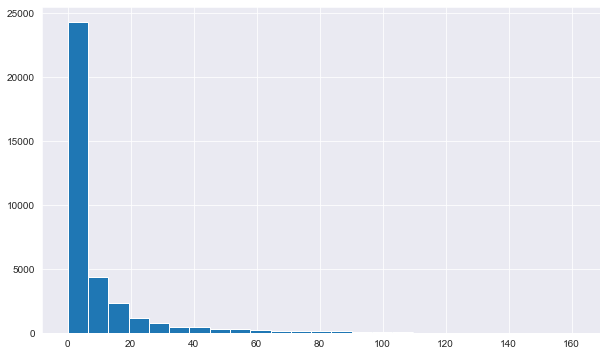

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
df['post_page_offset'].hist(bins=25)

---

In [7]:
Times_seies_df = df.set_index('created_at',drop=True)
Times_seies_df['action'] = Times_seies_df['action'].apply(lambda x:1 if x=='load_post_page' else 0)

<Figure size 720x432 with 0 Axes>

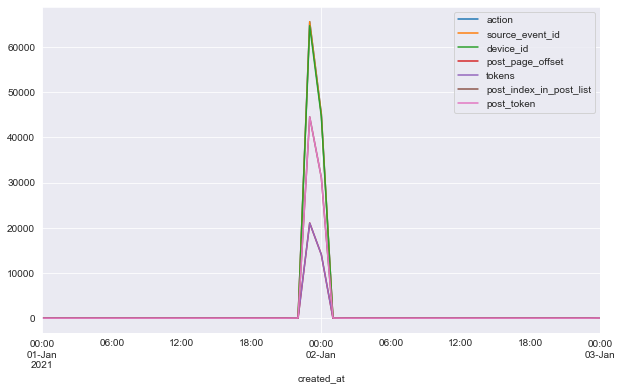

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
Times_seies_df.resample('H').count().plot(figsize=(10,6))

---

<h2 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> سوال #1
</h2>


<h3 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma;font-size:20px'>
    <b>
خطاهای مربوط به داده ها:
    </b>
</h3>

<ul style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma;font-size:18px'>
    <li style=direction:rtl>برای تعدادی از داده ها صرفا اکشن کلیک،بدون اکشن لود ثبت شده است. </li>
    <br>
    <li style=direction:rtl>تعداد زیادی device_id  ثبت نشده داریم که برای بررسی یکتا بودن source_event  مشکل ایجاد میکند. </li>
    <br>
    <li style=direction:rtl>برای یک source_event  یکسان تعداد زیادیload_post_page داریم که نامتناسب و عجیب به نظر میرسد. </li>
    <br>

</ul>

---

<h2 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> سوال #2
</h2>


In [40]:
def get_number_of_results(result_token):
    if result_token != np.nan:
        results = str(result_token).split(',')
        return len(results)
    else:
        return np.nan

df['number_of_results'] = df['tokens'].apply(lambda x:get_number_of_results(x))

<h4 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> 
    متریک dark query percent 
</h4>

In [15]:
dark_query_percent = len(df[(df['action']=='load_post_page')&(df['number_of_results']<10)&(df['post_page_offset']==0)])/len(df[(df['action']=='load_post_page')])*100
dark_query_percent

3.3723467565959133

<h4 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> 
    متریک query bounce rate 
</h4>

In [16]:
source_df = df.groupby(by=['source_event_id','action']).count()['number_of_results']
clicked = source_df.reset_index().groupby('source_event_id').count()['action'].value_counts()

In [193]:
query_bounce_rate = clicked[1]/len(df[df['action']=='load_post_page'])*100
query_bounce_rate

23.779295491257404

---

<h2 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> سوال #3
</h2>


In [29]:
given_query = 'ffef6048-9db0-4244-9750-3b530552f0ec'

<h4 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> 
<strong>
    متریک درصد آگهی های کلیک شده نسبت به آگهی های لود شده 
</strong>
</h4>

<br>


In [17]:
def get_click_percent(given_query):
    clicked_loaded_df = df[df['source_event_id']== given_query]
    if 'load_post_page' in list(clicked_loaded_df['action']):
        loaded = clicked_loaded_df[(clicked_loaded_df['action']=='load_post_page')]
        if 'click_post' in list(clicked_loaded_df['action']):
            clicked = clicked_loaded_df[clicked_loaded_df['action']=='click_post']
        else:
            clicked = np.nan
    else:
        loaded = np.nan

    if clicked & loaded != np.nan:
        return len(clicked)/(loaded['number_of_results']*loaded['post_page_offset'])*100
    else:
        return 'no load or click'

<h4 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> 
<strong>
    متریک رتبه اولین کلیک کاربر 
</strong>
</h4>

<br>


In [42]:
def get_first_click(given_query):
    clicked_df = df[df['source_event_id']== given_query]
    clicked_df = clicked_df.sort_values('created_at')
    if 'click_post' in list(clicked_df['action']):
        return clicked_df[clicked_df['action']=='click_post'].iloc[0]['post_index_in_post_list']
    else:
        return np.nan

<h4 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> 
<strong>
    متریک میانگین فاصله بین رتبه کلیک های کاربر
</strong>
</h4>

<br>


In [19]:
def get_clicks_Avg_mark(given_query):
    clicked_df = df[df['source_event_id']== given_query]
    clicked_df = clicked_df.sort_values('created_at')
    marks = []
    if 'click_post' in list(clicked_df['action']):
        marks.append(clicked_df[clicked_df['action']=='click_post']['post_index_in_post_list'])
        mark = sum(sum(marks))/len(marks)
        return mark
    else:
        return 'no click'

<h4 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> 
<strong>
اینکه آیا روی یکی از ۳ نتیجه اول کوئری کلیک شده یا نه</strong>
</h4>

<br>






In [20]:
def check_first_3_posts(qiven_query):
    clicked_df = df[df['source_event_id']== given_query]
    posts = []
    check = False
    if 'click_post' in list(clicked_df['action']):
        posts = (clicked_df[clicked_df['action']=='click_post'].iloc[:]['post_index_in_post_list'])
        for i in posts:
            if i < 3 :
                check = True

        if check:
            return True
    else:
        return False

In [43]:
%time
df['First_click'] = df['source_event_id'].apply(lambda x:get_first_click(str(x)))


Wall time: 0 ns


In [45]:
df['First_click'].mean()

56.181102362204726

<h3 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'>
به نظر من
    <i >
    متریک رتبه اولین کلیک کاربر
    </i>
    متریک مناسب تری است.
<br>
در واقع برای انتخاب این متریک نقاط ضعف و قوت تمام متریک ها را کنار هم قرار دادم و به این نتیجه رسیدم ولی به طور کلی واضح است که
همه این متریک ها کنار هم مانند مدل سوال 4 و یا وابسته به کاربرد و مسئله مورد نظر ما بهتر و بهینه تر قابل استفاده هستند.
    <br>
    در ادامه نکات مربوط به هر متریک را تیتر وار بیان میکنم:

</h3>
<ul style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma;font-size:18px'>
    <br>
<li>
متریک درصد آگهی کلیک شده نسبت به آگهی  لود شده نمیتواند به ما خروجی ای ارائه دهد که بر اساس آن عملکرد را بهبود ببخشیم.
نتیجه گیری ساده از کم بودن این متریک میتواند این باشد که کاربر کوئری درست و مد نظر خود را جستجو نکرده است، که در حالت ساده رویکرد مناسبی برای بهبود آن پیشنهاد نمیدهد.
یا خیلی بالا بودن این متریک نشان دهنده این است که کاربر روی تعداد زیادی اگهی کلیک کرده که ممکن است رفتار این کاربر صرفا برای دیدن جزئیات اگهی ها بوده باشد و در نتیجه قابل استناد نیست.
</li>
    <br>
<li>
متریک میانگین فاصله بین رتبه کلیک های کاربر ممکن است در مواجهه با رتبه کلیک های unbalanced  ضعیف عمل کند و دید نامناسبی روی کلیک های کاربر میدهد.
همچنین ممکن است برخی یوزر ها روی تعداد زیادی اگهی کلیک کنند که این میانگین فاصله را به سمت عدد ثابتی میبرد.
</li>
    <br>
<li>
متریک کلیک روی 3 نتیجه اول هم بدلیل اینکه نمایش خروجی ها همیشه بر حسب زمان آخرین آگهی بوده عملا میتواند نشان دهد که این رویکرد نمایش آگهی در این موقعیت مناسب هست یا نه.
</li>
    <br>
<li>
از آنجایی که در زمان کلیک کردن کاربر عادی بعد از یک overlook  روی تمام اگهی ها، آگهی ای را انتخاب میکند که بیشترین میزان fit شدن روی نظر یا کوئری اش را دارد
پس میتوان از اولین کلیک کاربر فهمید کدام نوع آگهی ها برای او جذابیت بیشتری دارند و به خواسته او نزدیک تر هستند و بر این اساس میتوان به میزان منلسب بودن عملکرد کوئری و نحوه نمایش آگهی های بعدی تا حدودی پی برد .البته در این متریک هم اگر کاربر روی تعداد زیادی آگهی کلیک کرده باشد تا صرفا جزئیات درون آگهی ها را ببیند نامناسب عمل میکند، ولی قابلیت بهبود بیشتر و بهتری را ارائه میدهد.
</li>
</ul>



---

<h2 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'> سوال #4
</h2>

<h5 style='direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma'>
متاسفانه به دلیل کمبود وقت در ایام امتحانات، فرصت حل این سوال را پیدا نکردم.
</h5>